In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [73]:
G = nx.scale_free_graph(10, seed = 0)

In [74]:
print("Weakly Connected?")
print(nx.is_weakly_connected(G))

Weakly Connected?
True


In [75]:
if not nx.is_weakly_connected(G):
    quit()

In [76]:
print(G)

MultiDiGraph with 10 nodes and 20 edges


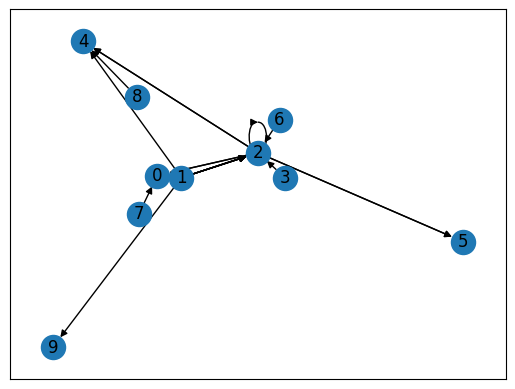

In [77]:
nx.draw_networkx(G, arrows = True)
plt.show()

In [78]:
def find_descendants(graph, start_node):
    
    descendants = set()

    def dfs(node):
        for neighbor in graph[node]:  # 遍历当前节点的所有邻居
            if neighbor not in descendants:  # 如果该邻居尚未访问
                descendants.add(neighbor)  # 标记为访问过
                dfs(neighbor)  # 递归访问该邻居

    dfs(start_node)
    return descendants

In [79]:
dic = dict()
for i in G.nodes:
    dic[i] = find_descendants(G,i)

In [71]:
from collections import defaultdict
dic2 = defaultdict(set)
for i in dic.keys():
    if i in dic2.values():
        continue
    else:
        for j in dic[i]:
            if i in dic[j]:
                dic2[i].add(j)
            else:
                dic2[j].add(j)

In [80]:
from collections import defaultdict

dic2 = defaultdict(set)
visited = set()  # 用于标记所有已处理的节点

for i in dic.keys():
    if i in visited:
        continue  # 如果当前节点已经处理过，跳过
    # 当前节点未处理，创建一个新的连通分量
    for j in dic[i]:
        if i in dic[j]:  # 强连通分量
            dic2[i].add(j)
            dic2[i].add(i)  # 将自己也加入到强连通分量
            visited.update(dic2[i])  # 标记所有属于该连通分量的节点为已处理
        else:  # 弱连通分量
            if j not in visited:  # 确保 j 不重复
                dic2[j].add(j)
                visited.add(j)
    # 如果 i 未被标记，则添加自己为单独的弱连通分量
    if i not in visited:
        dic2[i].add(i)
        visited.add(i)


In [81]:
dic

{0: {0, 1, 2, 4, 5, 9},
 1: {0, 1, 2, 4, 5, 9},
 2: {0, 1, 2, 4, 5, 9},
 3: {0, 1, 2, 4, 5, 9},
 4: set(),
 5: set(),
 6: {0, 1, 2, 4, 5, 9},
 7: {0, 1, 2, 4, 5, 9},
 8: {4},
 9: set()}

In [82]:
dic2

defaultdict(set,
            {0: {0, 1, 2},
             4: {4},
             5: {5},
             9: {9},
             3: {3},
             6: {6},
             7: {7},
             8: {8}})

In [7]:
# Reduce G to its strongly connected components, with the nodes of the components being represented by a representative of G
C = nx.condensation(G)

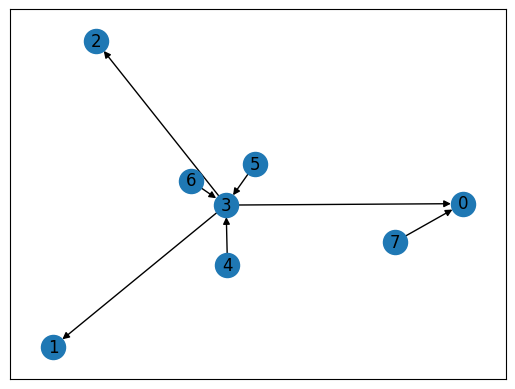

In [8]:
nx.draw_networkx(C, arrows = True)
plt.show()

In [9]:
representatives = [list(C.nodes[i]['members'])[0] for i in range(len(C))]
print(representatives)

[4, 5, 9, 0, 3, 6, 7, 8]


In [10]:
vision = dict()  # the dictionary of sinks each source points at
sinks = set()
sources = set()

In [11]:
for node in C:
    if C.in_degree(node) == 0:
        sources.add(node)
    if C.out_degree(node) == 0:
        sinks.add(node)

In [19]:
for source in sources:
    descendants1 = nx.descendants(C, source)
    descendants2 = find_descendants(C, source)
    if descendants1 == descendants2:
        print(True)

True
True
True
True


In [24]:
for source in sources:
    descendants = nx.descendants(C, source)
    vision[source] = set.intersection(set(descendants),sinks)

In [25]:
print(sources)
print(sinks)
print(vision)

{4, 5, 6, 7}
{0, 1, 2}
{4: {0, 1, 2}, 5: {0, 1, 2}, 6: {0, 1, 2}, 7: {0}}


In [27]:
m = len(sinks)
n = len(sources)

In [28]:
edges_to_add = list()
visible_sinks = set()
connected_sinks = set()
connected_sources = set()

In [29]:
first_source = list(sources)[0]
visible_sinks = set(vision[first_source])

In [30]:
# first make it so our first source can 'see' all sinks
while visible_sinks != sinks:
    for source in set.difference(sources, connected_sources):
        possible_sinks_to_add = list(set.intersection(set.difference(sinks, set(visible_sinks)), set(vision[source])))

        if len(possible_sinks_to_add) != 0:
            connected_sinks.add(list(visible_sinks)[0])
            edges_to_add.append((representatives[list(visible_sinks)[0]], representatives[source]))
            visible_sinks = set.union(visible_sinks, set(possible_sinks_to_add))
            connected_sources.add(source)
            break

[]